# 2025-BBS-DM EXAM - Big Data pipeline

Use this notebook to create a Big Data pipeline with PySpark according to the instructions below.

It is optional to conclude this part by executing some OLAP queries with the tool of your choice (pandas+matplotlib, PowerBI, Spark, etc.).

## Evaluation

Things considered in the evaluation:
  1. The correctness of the logic of the workflow
  2. The correctness of the code (syntax errors, etc.)
  3. The performance of the code (i.e., no unnecessary operations, getting rid of useless columns as soon as possible)
  4. The addition of comments that explain the logic of the code

The execution of queries (with comments) on the final result can give bonus points.

# MovieLens

[MovieLens](https://grouplens.org/datasets/movielens/) is a dataset about movies and ratings. You are working with two files:

- ml-movies.csv: contains details about the movies
  - Each movie is identified by ```movieId```
  - Each movie is associated to one or more genres, which are separated by semi-colons (e.g., "Adventure;Children;Fantasy")
- ml-ratings-1m.csv: contains 1 million ratings (in a range from 1 to 5) given by users to movies
  - Each rating is identified by ```movieId``` and ```userId```
  - Each rating is associated to a timestamp (e.g., 1256677221)

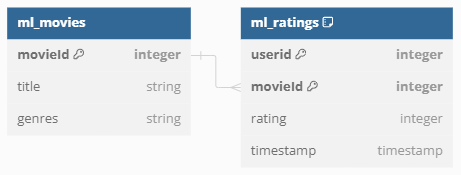

Your goal is to create a single file representing the following cube.

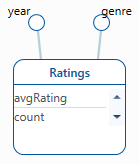

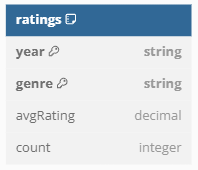

The procedure to create the cube is the following.

1. On the ml-movies.csv file:
  - Each line represents a movie, and each movie has many genres. We want to "explode" the genres, in order to have the same movie repeated for each genre (i.e., the equivalent of the ```flatMap``` on RDDs). To do so:
    - Use the ```split(df['mycolumn'],";")``` function to split a column on the pipe character; it converts from one String to an array of Strings
    - Use the ```explode_outer()``` function on the result to produce one line per value
    - Replace null genres with the "Undetermined" value
2. On the ml-ratings-1m.csv:
  - Convert the decimal character from comma to dot (as done during class)
  - Convert the timestamp to the "yyyy" format; to do so, use the ```from_unixtime(dfRatings['my_column'],"mydateformat")``` function to convert from timestamp to the format of your choice
3. Join the two datasets on the ```movieId```
4. Aggregate the data by genre and year to calculate the average rating and count the records; then, sort the results by year and genre using the ```orderBy()``` method
5. Save the result to a file
6. Optional queries:
  - the monthly trends of average ratings, one line per genre;
  - a bar chart showing, for each genre, the number of ratings and/or the average rating

In the process, exclude the fields that are not needed anymore as early as possible (the less data you carry, the better).

Your output should resemble the following:

```
+------------+----+------------------+-----+
|       genre|year|         avgRating|count|
+------------+----+------------------+-----+
|      Action|1996| 3.428543180582332|20229|
|   Adventure|1996|3.4985317672183665|14984|
|   Animation|1996|3.7092354069608113| 3649|
|    Children|1996| 3.517741935483871| 6820|
|      Comedy|1996| 3.404184793867827|24135|
|       Crime|1996|3.6160085203998036|12206|
| Documentary|1996|3.8345864661654137|  266|
|       Drama|1996| 3.700375201000536|27985|
|     Fantasy|1996|3.4779989045097683| 5477|
|   Film-Noir|1996|3.5616438356164384|  146|
|      Horror|1996| 3.516431924882629| 2769|
|        IMAX|1996| 3.888088376560999| 2082|
|     Musical|1996|3.6666666666666665| 3435|
|     Mystery|1996|3.6967410983705493| 3314|
|     Romance|1996|3.6002949852507373|14238|
|      Sci-Fi|1996|3.4102089394340123| 7562|
|    Thriller|1996|3.5943095072866065|21615|
|Undetermined|1996|3.5129533678756477|  386|
|         War|1996|3.9569221628045157| 3366|
|     Western|1996| 3.563403552251136| 2421|
+------------+----+------------------+-----+
```

# Initialize Spark

This must be done every time you run the notebook.

In [ ]:
import findspark
findspark.init()
findspark.find() # Should return the directory of the Spark home

In [ ]:
import os
from pyspark.sql import SparkSession

os.environ["SPARK_LOCAL_HOSTNAME"] = "localhost"

spark = SparkSession.builder\
        .master("local")\
        .appName("Local Spark")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
sc = spark.sparkContext

sc

In [ ]:
from pyspark.sql.functions import *
import datetime